In [2]:
!pip install lovely-numpy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import scipy as sp
import os
from scipy.io import wavfile
import lovely_numpy as ln
import matplotlib.pyplot as plt
import json_tricks

In [4]:
sample_rate, data = wavfile.read('sample.wav', mmap=True)
wavfile.write('original.wav', sample_rate, data)

# data = data.mean(axis=1)

In [5]:
print("ORIGINAL DATA")
print(ln.lovely(data))

data = data[:, 0] + data[:, 1] * 1.j
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T)

ORIGINAL DATA
memmap[191027, 2] i16 n=382054 (0.7Mb) x∈[-20505, 26899] μ=-4.501 σ=2.685e+03


In [6]:
def compress(input, frequencies=1000):
    a = []
    ### YOUR CODE HERE ###
    
    fft_data = np.fft.fft(input)
    magnitude = np.abs(fft_data)
    largest_indices = np.argsort(magnitude)[-frequencies:]
    compressed = [(index, fft_data[index]) for index in largest_indices]

    return np.array(compressed)

def decompress(input, data_len=191027):
    ### YOUR CODE HERE ###
    
    fft_data = np.zeros(data_len, dtype=np.complex128)
    
    for index, value in input:
        fft_data[int(index)] = value
    
    res = np.fft.ifft(fft_data)
    

    return res

In [7]:
compressed = compress(data, frequencies=10000)

json_tricks.dump(compressed, '.answer.json')

decompressed = decompress(compressed)

print(ln.lovely(data))
print(ln.lovely(decompressed))

array([-25.-25.j, -24.-24.j, -23.-23.j, ..., -34.-34.j, -35.-35.j,
       -31.-31.j])
array([133.32177054+133.32177054j, 141.23382789+141.23382789j,
       163.05194488+163.05194488j, ..., 243.76148649+243.76148649j,
       187.63963436+187.63963436j, 148.40826848+148.40826848j])


/tmp/ipykernel_8011/2025975726.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_data[int(index)] = value


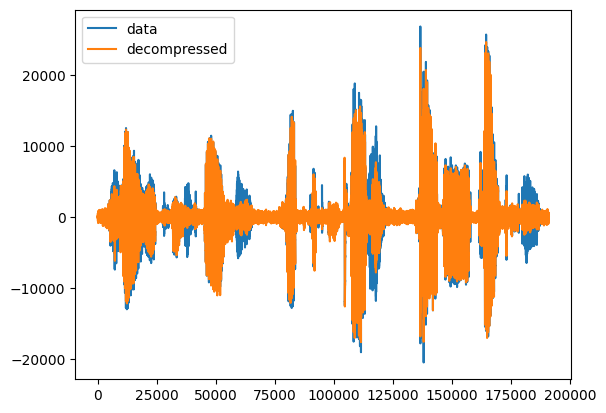

In [8]:
plt.plot(data.real, label='data')
plt.plot(decompressed.real,label='decompressed')
plt.legend()

In [9]:
wavfile.write('decompressed.wav', sample_rate, np.array([decompressed.real, decompressed.imag]).T.astype('int16'))

In [10]:
wavfile.write('original.wav', sample_rate, np.array([data.real, data.imag]).T.astype('int16'))

In [11]:
from IPython.display import Audio

Audio("decompressed.wav")

In [12]:
from IPython.display import Audio

Audio("sample.wav")